In [47]:
# All the imports
import matplotlib.pyplot as plt
import numpy as np
import itertools
import tqdm
import Hopfield


3.0 Hopfield Network recall

In [48]:
def part3_0():
    x1 = np.array([-1,-1,1,-1,1,-1 ,-1 ,1], dtype=float)
    x2 = np.array([-1,-1,-1,-1,-1,1,-1,-1], dtype=float)
    x3 = np.array([-1,1,1,-1,-1,1,-1,1], dtype=float)
    patterns = np.array([x1,x2,x3])
    network = Hopfield.Hopfield(max_iterations=1)
    network.fit(patterns)
    results = network.predict(patterns)

    for x in range(len(patterns)):
        print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))
        


part3_0()

Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True


### 3.1 Convergence and attractors of Hopfields
- Apply the update rule repeatedly until you reach a stable fixed point. Did all the patterns converge towards stored patterns?

**Answer:** Yes it did converge towards the stored patterns.

In [49]:
# Did all the patterns converge to fixed points? --> Yes
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])
patterns = np.array([x1d,x2d,x3d])

print("Testing with Batch update")

network = Hopfield.Hopfield(max_iterations=100)
network.fit(patterns)
results = network.predict(patterns)
for x in range(len(patterns)):
    # Print if they are fixed points are not
    print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))

print("Number of fixed points: ", np.sum([np.array_equal(patterns[x], results[x]) for x in range(len(patterns))]))

print("Testing with sequential update")
network = Hopfield.Hopfield(max_iterations=100, prediction_method="sequential")
network.fit(patterns)
results = network.predict(patterns)
for x in range(len(patterns)):
    # Print if they are fixed points are not
    print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))

Testing with Batch update
Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True
Number of fixed points:  3
Testing with sequential update
Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True


- How many attractors are there in this network? Hint: automate the searching. 

Number of attractors:  6
occurrences:  [32. 32. 64. 64. 32. 32.]
The attractors are:  [[-1 -1 -1  1 -1 -1  1 -1]
 [-1 -1  1  1  1 -1  1  1]
 [-1  1 -1  1 -1  1  1 -1]
 [ 1 -1  1 -1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1  1  1 -1  1]]


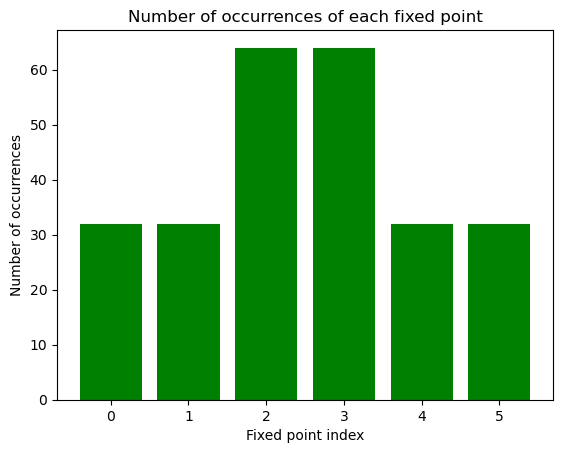

In [50]:
# Creation of the set of all combinations of 3 patterns
all_patterns = np.array([np.array(i) for i in itertools.product([-1, 1], repeat=8)])

# For each combination, find the fixed point
network_mine = Hopfield.Hopfield(max_iterations=3, prediction_method="sequential")
network_mine.fit(patterns)
results = network_mine.predict(all_patterns)

# Finding the attractors
attractors = np.unique(results, axis=0)
occurences = np.zeros(len(attractors))
for i, attractor in enumerate(attractors):
    for j in range(len(results)):
        if np.array_equal(attractor, results[j]):
            occurences[i] += 1

print("Number of attractors: ", len(attractors))
print("occurrences: ", occurences)
print("The attractors are: ", attractors)

# Plotting the attractors
plt.bar(range(len(attractors)), occurences, color="green")
plt.xlabel("Fixed point index")
plt.ylabel("Number of occurrences")
plt.title("Number of occurrences of each fixed point")
plt.show()

- What happens when you make the starting pattern even more dissimilar to the stored ones (e.g more than half is wrong)
**Answer** Cannot converge to the stored patterns.

In [51]:
# These three input patterns have 5 bit errors, compared with x1, x2 and x3
x1d2 = np.array([1, 1, -1, 1, -1, -1, -1, 1])
x2d2 = np.array([1, 1, 1, 1, 1, 1, -1, -1])
x3d2 = np.array([1, -1, -1, 1, 1, 1, -1, 1])
patterns_d2 = np.array([x1d2, x2d2, x3d2])

network = Hopfield.Hopfield()

network.fit(patterns)
results = network.predict(patterns_d2)

for x in range(len(patterns_d2)):
    print("Pattern ", x+1, " is a fixed point: ", np.array_equal(patterns[x], results[x]))
    

Pattern  1  is a fixed point:  False
Pattern  2  is a fixed point:  False
Pattern  3  is a fixed point:  False


## 3.2 Sequential update
Switching to a 1024 neuron network. Load the pict.dat which contains nine 1024 pixel images. Name them p1,p2.... p9. Learn the first three. Since large pattersn are hard to read as row of numbers, please display these 1024-dim pattersn as a 32x32 image.

- Check that the three patterns are stable.


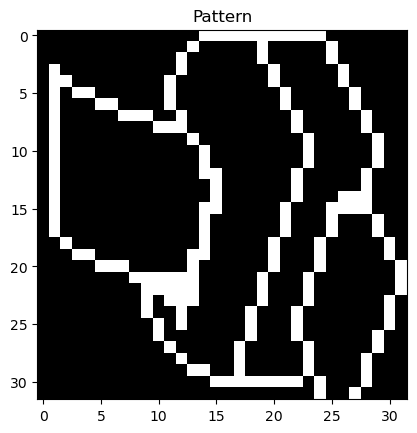

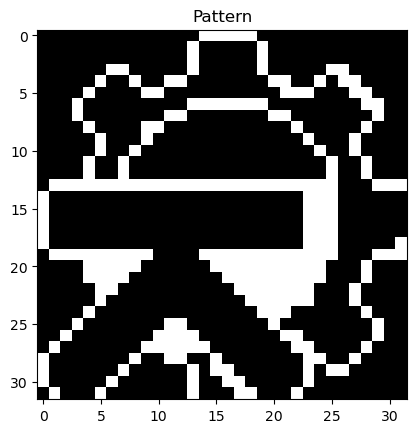

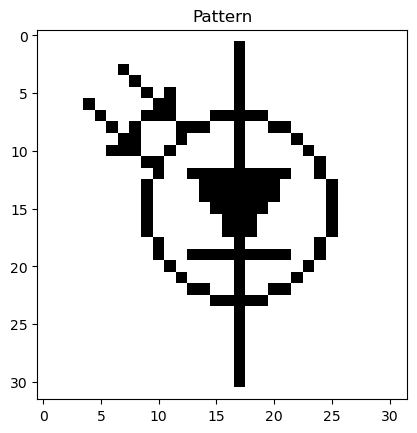

Pattern  1  is a fixed point:  True
Pattern  2  is a fixed point:  True
Pattern  3  is a fixed point:  True


In [52]:
data = np.genfromtxt("../pict.dat", delimiter=",")

# Separates all the data into 11 patterns of size 1024
def separate_data(data):
    patterns = []
    L = []
    for i in range(len(data)):
        if i % 1024 == 0 and i != 0:
            patterns.append(L)
            L = []
        L.append(data[i])
    patterns.append(L)
    return np.array(patterns)


# Displats the patterns
def display_pattern(pattern):
    pattern = pattern.reshape(32, 32)
    plt.imshow(pattern, interpolation="nearest", cmap="gray")
    if np.array_equal(pattern, p10.reshape(32, 32)) or np.array_equal(
        pattern, p11.reshape(32, 32)
    ):
        plt.title("Degraded pattern")
    else:
        plt.title("Pattern")
    plt.show()


patterns = separate_data(data)

p1 = patterns[0]
p2 = patterns[1]
p3 = patterns[2]
p4 = patterns[3]
p5 = patterns[4]
p6 = patterns[5]
p7 = patterns[6]
p8 = patterns[7]
p9 = patterns[8]
p10 = patterns[9]
p11 = patterns[10]

# Displaying the patterns
display_pattern(p1)
display_pattern(p2)
display_pattern(p3)

training_data = np.array([p1, p2, p3])
network = Hopfield.Hopfield(max_iterations=8, prediction_method="sequential")
network.fit(training_data)
results = network.predict(training_data)

for x in range(len(training_data)):
    print("Pattern ", x + 1, " is a fixed point: ", np.array_equal(training_data[x], results[x]))



- Can the network complete a degraded pattern? Try the pattern p10 which is a degraded version of p1. Or try p11 which is a mixture of p2 and p3.
**Answer** Yes, it can complete the degraded pattern.

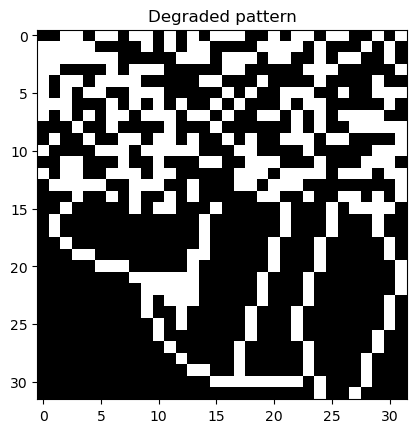

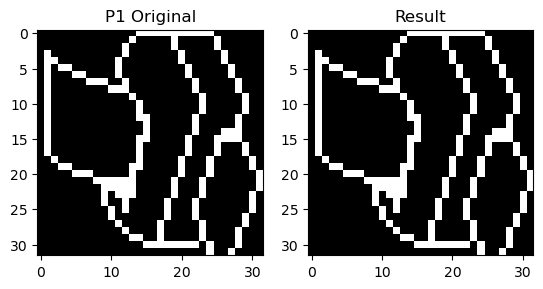

In [53]:
display_pattern(p10)
p10_result = network.predict(p10.reshape((1, 1024)))[0]
# Create a subplot 1x2 and display the original and the result
fig, ax = plt.subplots(1, 2)
ax[0].imshow(p1.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[0].set_title("P1 Original")

ax[1].imshow(p10_result.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[1].set_title("Result")
plt.show()


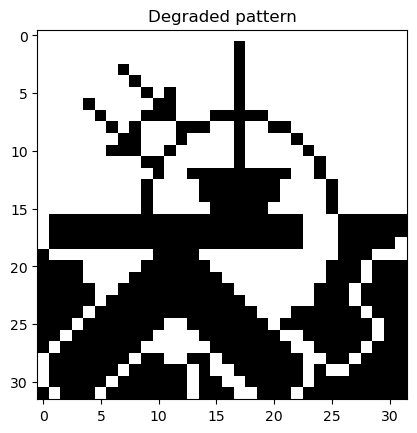

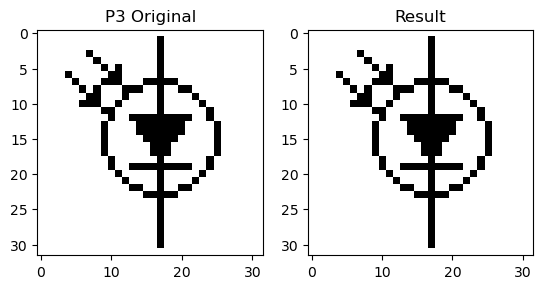

In [54]:
# Tesint for p11
display_pattern(p11)
network = Hopfield.Hopfield(max_iterations=8, prediction_method="sequential")
network.fit(training_data)
p11_result = network.predict(p11.reshape((1, 1024)))[0]

# Create a subplot 1x2 and display the original and the result
fig, ax = plt.subplots(1, 2)
ax[0].imshow(p3.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[0].set_title("P3 Original")

ax[1].imshow(p11_result.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[1].set_title("Result")
plt.show()



- Clearly convergence is practically instantaneous. What happens if we select units randomly? Please calculate their new state and then repeat the process in the spirit of the original sequential Hopfield dynamics. Please demonstrate the image every hundredth iteration or so

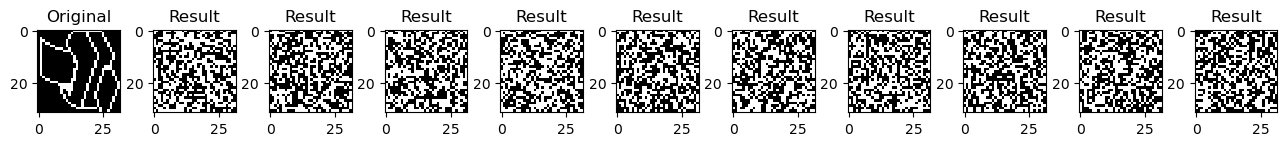

In [59]:
network0 = Hopfield.Hopfield(
    max_iterations=100, random_weights=True, prediction_method="sequential"
)
network1 = Hopfield.Hopfield(
    max_iterations=200, random_weights=True, prediction_method="sequential"
)
network2 = Hopfield.Hopfield(
    max_iterations=300, random_weights=True, prediction_method="sequential"
)
network3 = Hopfield.Hopfield(
    max_iterations=400, random_weights=True, prediction_method="sequential"
)
network4 = Hopfield.Hopfield(
    max_iterations=500, random_weights=True, prediction_method="sequential"
)
network5 = Hopfield.Hopfield(
    max_iterations=600, random_weights=True, prediction_method="sequential"
)
network6 = Hopfield.Hopfield(
    max_iterations=700, random_weights=True, prediction_method="sequential"
)
network7 = Hopfield.Hopfield(
    max_iterations=800, random_weights=True, prediction_method="sequential"
)
network8 = Hopfield.Hopfield(
    max_iterations=900, random_weights=True, prediction_method="sequential"
)
network9 = Hopfield.Hopfield(
    max_iterations=1000, random_weights=True, prediction_method="sequential"
)

networks = [
    network0,
    network1,
    network2,
    network3,
    network4,
    network5,
    network6,
    network7,
    network8,
    network9,
]

# Create a 1 x 11 subplot and display the results. The first one will be the orginal and the rest will be the results
fig, ax = plt.subplots(1, 11, figsize=(16, 4))  # Adjust figsize as needed
fig.subplots_adjust(wspace=0.4)  # Adjust horizontal space between subplots

ax[0].imshow(p1.reshape(32, 32), interpolation="nearest", cmap="gray")
ax[0].set_title("Original")

for i in range(10):
    networks[i].fit(training_data)
    result = networks[i].predict(p1.reshape((1, 1024)))[0]
    ax[i + 1].imshow(result.reshape(32, 32), interpolation="nearest", cmap="gray")
    ax[i + 1].set_title("Result")

plt.show()